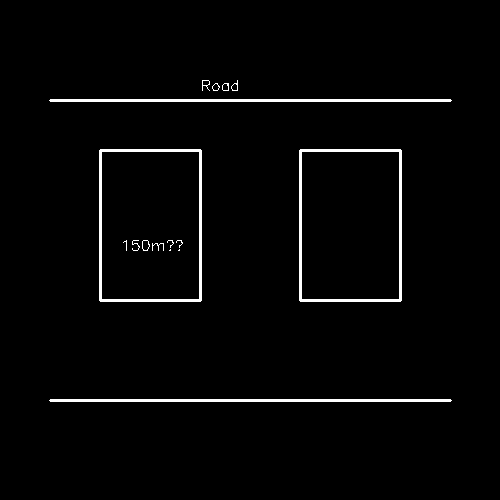

True

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Create a blank canvas (500x500 pixels)
img = np.zeros((500, 500, 3), dtype=np.uint8)

# Draw roads (lines)
cv2.line(img, (50, 100), (450, 100), (255, 255, 255), 2)  # Top road
cv2.line(img, (50, 400), (450, 400), (255, 255, 255), 2)  # Bottom road

# Draw plots (rectangles)
cv2.rectangle(img, (100, 150), (200, 300), (255, 255, 255), 2)  # Plot 1
cv2.rectangle(img, (300, 150), (400, 300), (255, 255, 255), 2)  # Plot 2

# Add labels (text)
cv2.putText(img, "Road", (200, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
cv2.putText(img, "150m²", (120, 250), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# Display the image in Colab
cv2_imshow(img)

# Optionally, save the image
cv2.imwrite('synthetic_site_plan.jpg', img)


In [3]:
!pip install albumentations

import cv2
import albumentations as A

# Load an image
img = cv2.imread('/content/synthetic_site_plan.jpg')

# Define augmentations
augment = A.Compose([
    A.Rotate(limit=30),
    A.RandomBrightnessContrast(),
    A.HorizontalFlip(),
    A.VerticalFlip()
])

# Apply augmentations
augmented = augment(image=img)['image']

cv2.imwrite('augmented_site_plan.jpg', augmented)


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


True

In [7]:
!pip install labelImg


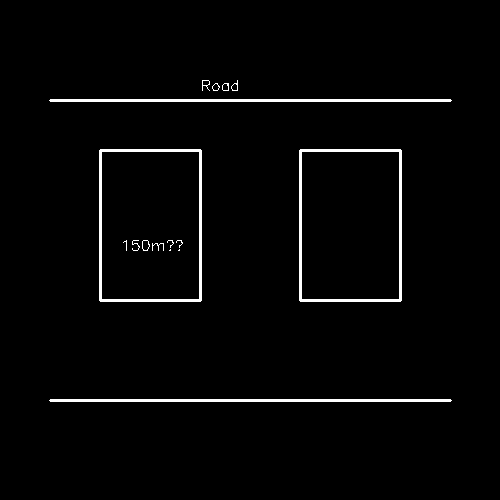

Image and annotation file created:
-rw-r--r-- 1 root root 13952 Mar  5 15:48 synthetic_site_plan.jpg
-rw-r--r-- 1 root root    75 Mar  5 15:48 synthetic_site_plan.txt


In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Create a blank canvas (500x500 pixels)
img = np.zeros((500, 500, 3), dtype=np.uint8)

# Draw roads (lines)
cv2.line(img, (50, 100), (450, 100), (255, 255, 255), 2)  # Top road
cv2.line(img, (50, 400), (450, 400), (255, 255, 255), 2)  # Bottom road

# Draw plots (rectangles)
cv2.rectangle(img, (100, 150), (200, 300), (255, 255, 255), 2)  # Plot 1
cv2.rectangle(img, (300, 150), (400, 300), (255, 255, 255), 2)  # Plot 2

# Add labels (text)
cv2.putText(img, "Road", (200, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
cv2.putText(img, "150m²", (120, 250), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# Display the image in Colab
cv2_imshow(img)

# Save the image
cv2.imwrite('synthetic_site_plan.jpg', img)

# YOLO annotations: class_id x_center y_center width height (all normalized between 0 and 1)
annotations = [
    "0 0.5 0.2 0.8 0.05",  # Road (class_id 0)
    "1 0.3 0.45 0.2 0.3",  # Plot (class_id 1)
    "1 0.7 0.45 0.2 0.3",  # Plot (class_id 1)
    "2 0.25 0.5 0.1 0.1"   # Text (class_id 2)
]

# Save annotations to a .txt file
with open('synthetic_site_plan.txt', 'w') as f:
    f.write('\n'.join(annotations))

print("Image and annotation file created:")
!ls -l | grep 'synthetic_site_plan'
